In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
df = sns.load_dataset('titanic')

In [37]:
df.shape

(891, 15)

In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


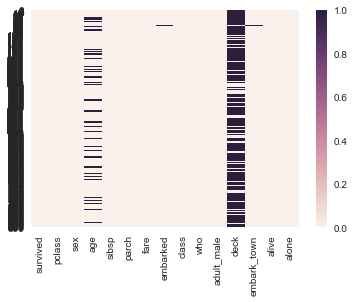

In [29]:
sns.heatmap(df.isnull())

In [38]:
# deck is the biggest culprit when it comes to missing values, let's remove it
df.drop(['deck'], axis=1, inplace=True)
df.dropna(inplace=True)

In [39]:
df.shape

(712, 14)

In [40]:
df['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [41]:
df['pclass'].value_counts()

3    355
1    184
2    173
Name: pclass, dtype: int64

In [42]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [43]:
df['sex'].value_counts()

male      453
female    259
Name: sex, dtype: int64

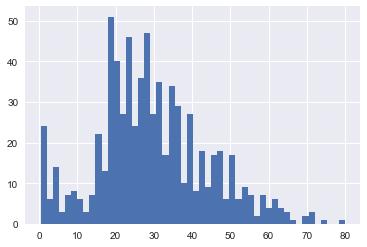

In [44]:
df['age'].hist(bins=50)

In [45]:
X = df[['pclass', 'sex', 'age']]

In [46]:
from sklearn import preprocessing

In [47]:
lb = preprocessing.LabelBinarizer()

In [48]:
X['sex'] = lb.fit_transform(X['sex'])

C:\Users\johna\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [49]:
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [50]:
X.describe()

,pclass,sex,age
count,712.000000,712.000000,712.000000
mean,2.240169,0.636236,29.642093
std,0.836854,0.481420,14.492933
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.000000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 3 columns):
pclass    712 non-null int64
sex       712 non-null int32
age       712 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 19.5 KB


In [52]:
y = df['survived']

In [53]:
# quite an uneven class
y.value_counts()

0    424
1    288
Name: survived, dtype: int64

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [55]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [104]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [105]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''Print scoring metrics for classifier on training data'''
    if train:
        print("Train Result:\n")
        print("Accuracy score: {0:.4f}".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report:\n {}".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix:\n {} \n".format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t {0:.4f}".format(np.std(res)))
        
      
    elif train == False:
        '''Print scoring metrics for classifier on test data'''  
        
        print("Test Result:\n")
        print("Accuracy score: {0:.4f}".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report:\n {}".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix:\n {} \n".format(confusion_matrix(y_test, clf.predict(X_test))))
        

## Decision Tree

In [106]:
clf = DecisionTreeClassifier(random_state=42)

In [107]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [108]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.9082
Classification Report:
              precision    recall  f1-score   support

          0       0.88      0.98      0.93       325
          1       0.97      0.79      0.87       209

avg / total       0.91      0.91      0.91       534

Confusion Matrix:
 [[319   6]
 [ 43 166]] 

Average accuracy: 	 0.8204
Accuracy SD: 	 0.0435


In [109]:
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.7584
Classification Report:
              precision    recall  f1-score   support

          0       0.73      0.89      0.80        99
          1       0.81      0.59      0.69        79

avg / total       0.77      0.76      0.75       178

Confusion Matrix:
 [[88 11]
 [32 47]] 



## Bagging

In [115]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=500,
                           bootstrap=True, n_jobs=-1,
                           random_state=42)

In [117]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [114]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.9082
Classification Report:
              precision    recall  f1-score   support

          0       0.90      0.96      0.93       325
          1       0.93      0.83      0.88       209

avg / total       0.91      0.91      0.91       534

Confusion Matrix:
 [[311  14]
 [ 35 174]] 

Average accuracy: 	 0.8260
Accuracy SD: 	 0.0386


In [118]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.7697
Classification Report:
              precision    recall  f1-score   support

          0       0.75      0.87      0.81        99
          1       0.80      0.65      0.71        79

avg / total       0.77      0.77      0.77       178

Confusion Matrix:
 [[86 13]
 [28 51]] 



***

# Bagging (OOB=True)

Use out of bag samples to estimate the generalization accuracy

In [120]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=500,
                           bootstrap=True, oob_score=True, n_jobs=-1,
                           random_state=42)

In [121]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

In [122]:
bag_clf.oob_score_

0.82209737827715357

In [123]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.9082
Classification Report:
              precision    recall  f1-score   support

          0       0.90      0.96      0.93       325
          1       0.93      0.83      0.88       209

avg / total       0.91      0.91      0.91       534

Confusion Matrix:
 [[311  14]
 [ 35 174]] 

Average accuracy: 	 0.8260
Accuracy SD: 	 0.0386


In [124]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.7697
Classification Report:
              precision    recall  f1-score   support

          0       0.75      0.87      0.81        99
          1       0.80      0.65      0.71        79

avg / total       0.77      0.77      0.77       178

Confusion Matrix:
 [[86 13]
 [28 51]] 



## Random Forest
Fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf_clf = RandomForestClassifier(random_state=42)

In [127]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [128]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.9026
Classification Report:
              precision    recall  f1-score   support

          0       0.90      0.95      0.92       325
          1       0.91      0.83      0.87       209

avg / total       0.90      0.90      0.90       534

Confusion Matrix:
 [[308  17]
 [ 35 174]] 

Average accuracy: 	 0.7939
Accuracy SD: 	 0.0567


In [129]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.8146
Classification Report:
              precision    recall  f1-score   support

          0       0.79      0.90      0.84        99
          1       0.85      0.71      0.77        79

avg / total       0.82      0.81      0.81       178

Confusion Matrix:
 [[89 10]
 [23 56]] 



## Grid Search

In [130]:
from sklearn.pipeline import Pipeline

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
rf_clf = RandomForestClassifier(random_state=42)

In [135]:
params_grid = {"max_depth":[3, None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ['gini', 'entropy']}

In [136]:
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs=-1, cv=5,
                          verbose=1, scoring='accuracy')

In [137]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   18.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, None], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [138]:
grid_search.best_score_

0.82397003745318353

In [140]:
grid_search.best_estimator_.get_params()

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [141]:
print_score(grid_search, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.8839
Classification Report:
              precision    recall  f1-score   support

          0       0.89      0.92      0.91       325
          1       0.87      0.83      0.85       209

avg / total       0.88      0.88      0.88       534

Confusion Matrix:
 [[298  27]
 [ 35 174]] 

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   20.1s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 345 out of 360 | elapsed:   18.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   18.8s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 302 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   17.6s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 345 out of 360 | elapsed:   18.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   18.2s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 302 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   18.7s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 255 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 345 out of 360 | elapsed:   19.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   19.0s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   20.3s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   17.0s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 345 out of 360 | elapsed:   19.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   19.2s finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 247 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 345 out of 360 | elapsed:   20.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   20.1s finished


Average accuracy: 	 0.8071
Accuracy SD: 	 0.0311


In [142]:
print_score(grid_search, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.7528
Classification Report:
              precision    recall  f1-score   support

          0       0.75      0.83      0.79        99
          1       0.75      0.66      0.70        79

avg / total       0.75      0.75      0.75       178

Confusion Matrix:
 [[82 17]
 [27 52]] 



## Extra-Trees
Fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [143]:
from sklearn.ensemble import ExtraTreesClassifier

In [149]:
xt_clf = ExtraTreesClassifier(random_state=42, min_samples_leaf=5)

In [150]:
xt_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [151]:
print_score(xt_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.8427
Classification Report:
              precision    recall  f1-score   support

          0       0.82      0.96      0.88       325
          1       0.91      0.67      0.77       209

avg / total       0.85      0.84      0.84       534

Confusion Matrix:
 [[311  14]
 [ 70 139]] 

Average accuracy: 	 0.8016
Accuracy SD: 	 0.0383


In [152]:
print_score(xt_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.7753
Classification Report:
              precision    recall  f1-score   support

          0       0.75      0.89      0.81        99
          1       0.82      0.63      0.71        79

avg / total       0.78      0.78      0.77       178

Confusion Matrix:
 [[88 11]
 [29 50]] 



# Conclusion

Random Forest performed the best on the test data.